# Linear Regression

** Goal: to perform linear regresssion on the team attributes and score data**

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model

%matplotlib inline

In [2]:
#define the seasons that we have
seasons = ['2009-2010', '2010-2011', '2011-2012', '2013-2014', '2014-2015', '2015-2016']

#we'll store each season's data as an element in the list datasets
datasets = []

#define file path
filepath = 'BIOF509Project/'

#now loop through the files and add each DataFrame to dataset
for year in seasons:
    filename = filepath + 'team_attributes_processed-' + year + '.csv'
    datasets.append(pd.read_csv(filename, index_col = 0))

In [3]:
#here's an example of the data -- 2009/2010 season
datasets[0]

,Team,Season,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceTeamWidthClass,defenceAggressionClass_Press,defenceAggressionClass_Double,defenceAggressionClass_Contain,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap,Score
0,Chelsea,2009/2010,0.838948,0.0,0.040464,-0.322535,0.345547,1.288855,-1.011775,-0.275589,...,3,0,1,2,1,0,0,1,0,86
1,Manchester United,2009/2010,0.838948,0.0,-1.063111,-1.187872,0.345547,0.802495,-0.275939,-1.194220,...,2,0,2,2,1,0,0,1,0,85
2,Arsenal,2009/2010,0.205780,0.0,-2.166686,-2.367878,-3.973795,-2.115668,-1.011775,-2.112850,...,2,0,1,2,1,0,0,1,0,75
3,Tottenham Hotspur,2009/2010,0.838948,0.0,-0.695252,-0.794537,-0.518321,-0.656587,0.459898,-1.194220,...,2,1,2,2,1,0,0,1,0,70
4,Manchester City,2009/2010,0.838948,0.0,0.040464,-0.401202,0.345547,1.288855,0.091980,-0.734904,...,3,1,2,2,1,0,0,1,0,67
5,Aston Villa,2009/2010,0.838948,0.0,-0.033107,0.385468,0.345547,-0.656587,-1.011775,0.643041,...,2,0,1,1,0,1,0,1,0,64
6,Liverpool,2009/2010,-2.326893,0.0,-1.798828,-0.794537,-1.382189,1.288855,-0.275939,-0.275589,...,3,1,2,2,1,0,0,1,0,63
7,Everton,2009/2010,-0.743973,0.0,0.408323,-0.007867,0.345547,-1.142947,-0.275939,0.643041,...,2,1,2,2,0,1,0,1,0,61
8,Birmingham City,2009/2010,0.838948,0.0,0.776181,0.778804,0.345547,1.288855,1.931570,0.643041,...,3,1,3,3,0,1,0,1,0,50
9,Blackburn Rovers,2009/2010,-1.535433,0.0,0.776181,-0.007867,0.345547,-0.170226,0.091980,0.643041,...,2,1,2,2,0,1,0,1,0,50


In [4]:
'''TRAINING DATA: first five seasons
    features:
        omit first two columns (team name and season) and last column (score)
    targets:
        last column (scores)'''
    
#initialize training data with first season 
X_train = datasets[0].iloc[:,2:-1].as_matrix()

#initialize training targets with first season
y_train = datasets[0].iloc[:,-1].as_matrix()

#loop through the rest of the seasons in the training set to append them onto our training data
for i in range(1, len(datasets) - 1):
    X_train = np.concatenate((X_train, datasets[i].iloc[:,2:-1].as_matrix()))
    y_train = np.concatenate((y_train, datasets[i].iloc[:,-1].as_matrix()))
    
'''TEST DATA: the last season (2015/2016)
    features:
        omit first two columns (team name and season) and last column (score)
    targets:
        last column (scores)'''

#get the test data
X_test = datasets[-1].iloc[:,2:-1].as_matrix()

y_test = datasets[-1].iloc[:,-1].as_matrix()


In [5]:
#start with basic linear regression
lm = linear_model.LinearRegression()

#fit with training data
lm.fit(X_train, y_train)

#predict the last season scores
y_predict = lm.predict(X_test)

In [6]:
#now measure accuracy with r2 score
metrics.r2_score(y_test, y_predict)

-0.038317421004037122

In [7]:
metrics.mean_absolute_error(y_test,y_predict)

11.990347518328127

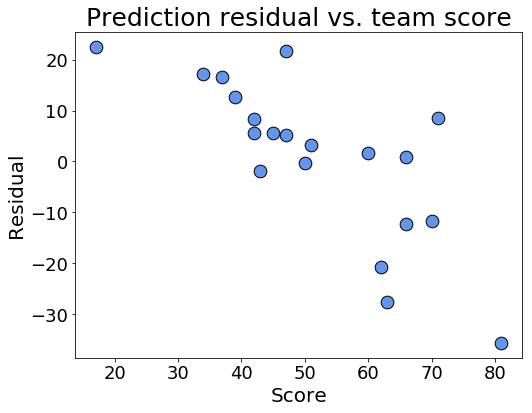

In [8]:
#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_test, residuals, s = 160, edgecolor = 'black',facecolor = 'cornflowerblue')
plt.xlabel('Score', fontsize = 20); plt.ylabel('Residual', fontsize = 20)
plt.title('Prediction residual vs. team score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

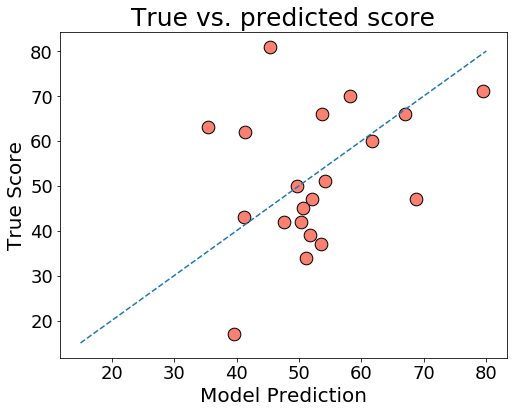

In [9]:
#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_predict, y_test, s = 160, edgecolor = 'black',facecolor = 'salmon')
plt.plot(np.linspace(15, 80,81), np.linspace(15, 80,81), linestyle = '--')
plt.xlabel('Model Prediction', fontsize = 20); plt.ylabel('True Score', fontsize = 20)
plt.title('True vs. predicted score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.savefig('true_vs_predicted.jpg')
plt.show()

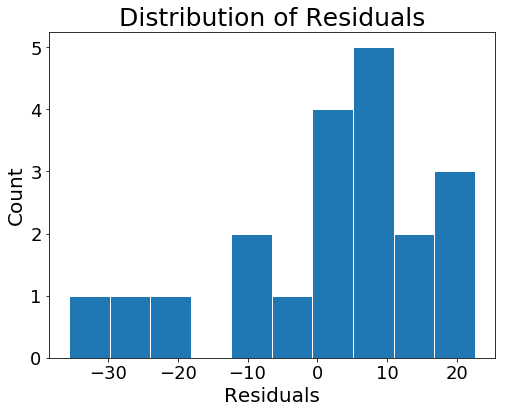

In [10]:
plt.figure(figsize = (8,6))
plt.hist(residuals, edgecolor = 'white', bins = 10)
plt.xlabel('Residuals', fontsize = 20); plt.ylabel('Count', fontsize = 20)
plt.title('Distribution of Residuals', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

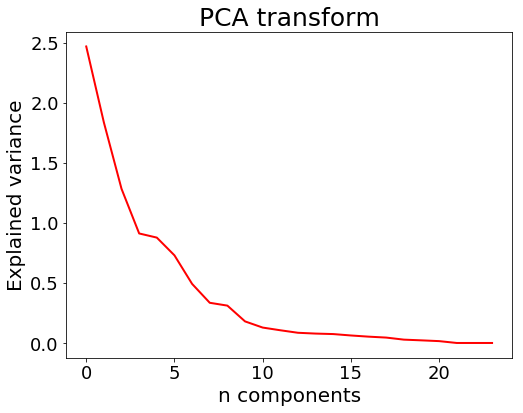

In [11]:
#now let's try dimensionality reduction to see if that's better
from sklearn.decomposition import PCA

#look at the variance
pca = PCA()
pca.fit(X_train)

plt.figure(figsize = (8,6))
plt.plot(pca.explained_variance_, linewidth = 2, color = 'red')
plt.ylabel('Explained variance', fontsize = 20); plt.xlabel('n components', fontsize = 20)
plt.title('PCA transform', fontsize = 25)
plt.tick_params(labelsize = 18)

In [12]:
#now let's try dimensionality reduction to see if that's better
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#let's create a pipeline with PCA and linear regression
linear = linear_model.LinearRegression()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', linear)])

#now define grid of interest for parameters
#we'll scan over PCA components - 5 to 20
n_components = [i for i in range(5,21)]

#perform a grid search to find the best parameters
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components))

estimator.fit(X_train, y_train)

print('Dimensionality of best PCA transform: {}'.format(estimator.best_estimator_.named_steps['pca'].n_components))

#predict the test data and apply the r2 metric
y_predict = estimator.predict(X_test)

print('R^2: {}'.format(metrics.r2_score(y_test, y_predict)))

Dimensionality of best PCA transform: 13
R^2: 0.003001327130758513


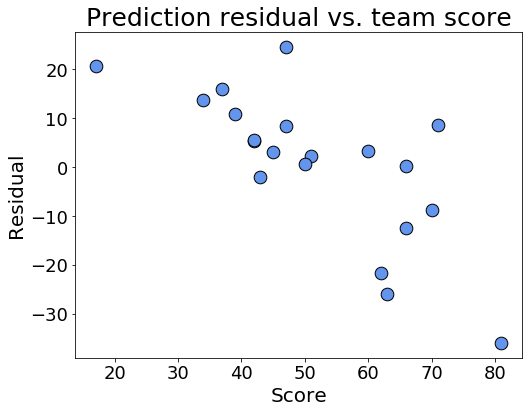

In [13]:
#yikes!

#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_test, residuals, s = 160, edgecolor = 'black',facecolor = 'cornflowerblue')
plt.xlabel('Score', fontsize = 20); plt.ylabel('Residual', fontsize = 20)
plt.title('Prediction residual vs. team score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

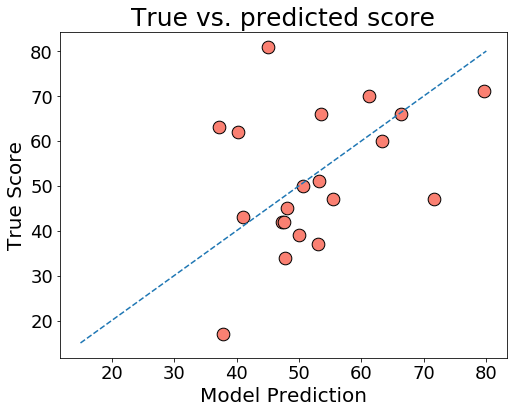

In [14]:
#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_predict, y_test, s = 160, edgecolor = 'black',facecolor = 'salmon')
plt.plot(np.linspace(15, 80,81), np.linspace(15, 80,81), linestyle = '--')
plt.xlabel('Model Prediction', fontsize = 20); plt.ylabel('True Score', fontsize = 20)
plt.title('True vs. predicted score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.savefig('linear_regression_true.jpg')
plt.show()

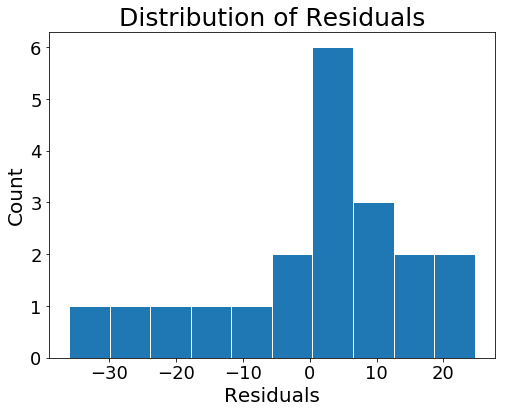

In [15]:
plt.figure(figsize = (8,6))
plt.hist(residuals, edgecolor = 'white', bins = 10)
plt.xlabel('Residuals', fontsize = 20); plt.ylabel('Count', fontsize = 20)
plt.title('Distribution of Residuals', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

In [16]:
#last resort: ElasticNet!

#we'll do another pipeline
elastic = linear_model.ElasticNet()
pca = PCA()
pipe = Pipeline(steps =[('pca', pca), ('elastic', elastic)])

#define parameter grids
n_components = [i for i in range(5,21)]

#l1 - the penality term for lasso; it exists in [0,1], with l2 = 1 - l1
l1 = np.linspace(0.1,1,10)

#now perform the grid search

estimator = GridSearchCV(pipe,
                        dict(pca__n_components=n_components, elastic__l1_ratio = l1))

estimator.fit(X_train, y_train)

print('Dimensionality of best PCA transform: {}'.format(estimator.best_estimator_.named_steps['pca'].n_components))
print('Value of best L1 ratio: {}'.format(estimator.best_estimator_.named_steps['elastic'].l1_ratio))

#predict the test data and apply the r2 metric
y_predict = estimator.predict(X_test)

print('\nR^2: {}'.format(metrics.r2_score(y_test, y_predict)))

Dimensionality of best PCA transform: 11
Value of best L1 ratio: 0.1

R^2: 0.1356280722723402


In [17]:
#calculate mean absolute error
metrics.mean_absolute_error(y_test, y_predict)

11.347096438757712

In [18]:
#export our results
results = pd.DataFrame({'Actual': y_test, 'Predict': y_predict})
results.to_csv('LinearRegressionPredictions_2015-2016.csv')

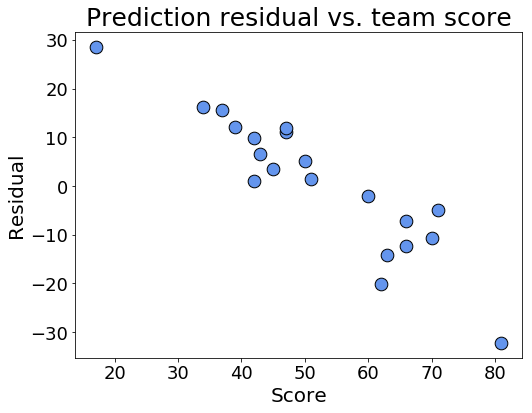

In [19]:
#slightly better...

#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_test, residuals, s = 160, edgecolor = 'black',facecolor = 'cornflowerblue')
plt.xlabel('Score', fontsize = 20); plt.ylabel('Residual', fontsize = 20)
plt.title('Prediction residual vs. team score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

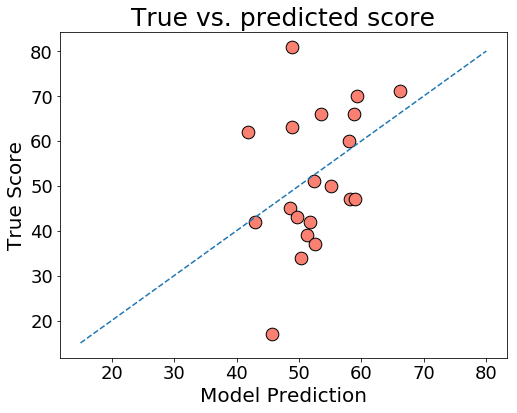

In [20]:
#plot the predictions and the target scores
residuals = y_predict - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_predict, y_test, s = 160, edgecolor = 'black',facecolor = 'salmon')
plt.plot(np.linspace(15, 80,81), np.linspace(15, 80,81), linestyle = '--')
plt.xlabel('Model Prediction', fontsize = 20); plt.ylabel('True Score', fontsize = 20)
plt.title('True vs. predicted score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.savefig('true_vs_predicted_en.jpg')
plt.show()


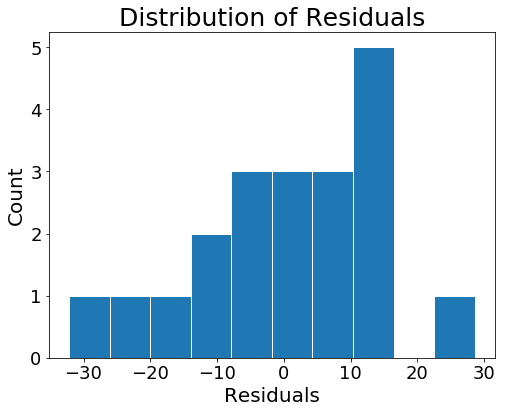

In [21]:
plt.figure(figsize = (8,6))
plt.hist(residuals, edgecolor = 'white', bins = 10)
plt.xlabel('Residuals', fontsize = 20); plt.ylabel('Count', fontsize = 20)
plt.title('Distribution of Residuals', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
#one last experiment...let's normalize the team scores within season
'''TRAINING DATA: first five seasons
    features:
        omit first two columns (team name and season) and last column (score)
    targets:
        last column (NORMALIZED scores)'''
    
#initialize training data with first season 
X_train = datasets[0].iloc[:,2:-1].as_matrix()

#initialize training targets with first season
y_train = StandardScaler().fit_transform(datasets[0].iloc[:,-1].as_matrix().reshape(-1,1))

#loop through the rest of the seasons in the training set to append them onto our training data
for i in range(1, len(datasets) - 1):
    X_train = np.concatenate((X_train, datasets[i].iloc[:,2:-1].as_matrix()))
    y_train = np.concatenate((y_train, StandardScaler().fit_transform(datasets[i].iloc[:,-1].as_matrix().reshape(-1,1))))
    
'''TEST DATA: the last season (2015/2016)
    features:
        omit first two columns (team name and season) and last column (score)
    targets:
        last column (NORMALIZED scores)'''

#get the test data
X_test = datasets[-1].iloc[:,2:-1].as_matrix()

y_test = StandardScaler().fit_transform(datasets[-1].iloc[:,-1].as_matrix().reshape(-1,1))


/Users/david/miniconda2/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [23]:
#now we'll try the pca/elastic net pipeline again

#we'll do another pipeline
elastic = linear_model.ElasticNet()
pca = PCA()
pipe = Pipeline(steps =[('pca', pca), ('elastic', elastic)])

#define parameter grids
n_components = [i for i in range(5,21)]

#l1 - the penality term for lasso; it exists in [0,1], with l2 = 1 - l1
l1 = np.linspace(0.1,1,10)

#now perform the grid search

estimator = GridSearchCV(pipe,
                        dict(pca__n_components=n_components, elastic__l1_ratio = l1))

estimator.fit(X_train, y_train)

print('Dimensionality of best PCA transform: {}'.format(estimator.best_estimator_.named_steps['pca'].n_components))
print('Value of best L1 ratio: {}'.format(estimator.best_estimator_.named_steps['elastic'].l1_ratio))

#predict the test data and apply the r2 metric
y_predict = estimator.predict(X_test)

print('\nR^2: {}'.format(metrics.r2_score(y_test, y_predict)))

Dimensionality of best PCA transform: 6
Value of best L1 ratio: 0.1

R^2: 0.055011421847557807


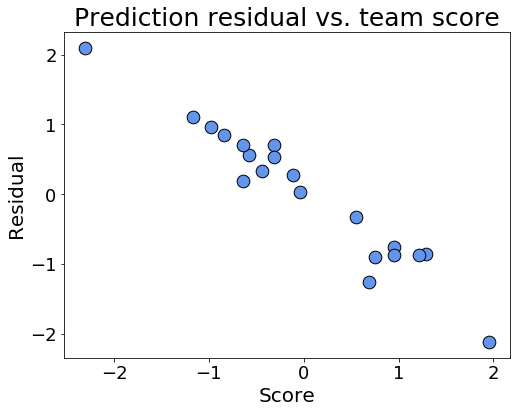

In [24]:
#we did worse....


#plot the predictions and the target scores
residuals = y_predict.reshape(-1,1) - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_test, residuals, s = 160, edgecolor = 'black',facecolor = 'cornflowerblue')
plt.xlabel('Score', fontsize = 20); plt.ylabel('Residual', fontsize = 20)
plt.title('Prediction residual vs. team score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

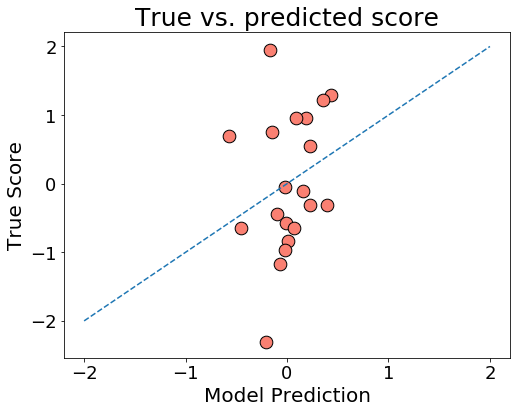

In [25]:
#plot the predictions and the target scores
residuals = y_predict.reshape(-1,1) - y_test

plt.figure(figsize = (8,6))
plt.scatter(y_predict, y_test, s = 160, edgecolor = 'black',facecolor = 'salmon')
plt.plot(np.linspace(-2, 2,21), np.linspace(-2, 2,21), linestyle = '--')
plt.xlabel('Model Prediction', fontsize = 20); plt.ylabel('True Score', fontsize = 20)
plt.title('True vs. predicted score', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()

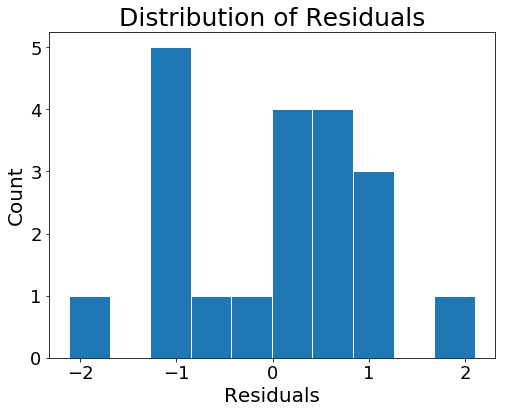

In [26]:
plt.figure(figsize = (8,6))
plt.hist(residuals, edgecolor = 'white', bins = 10)
plt.xlabel('Residuals', fontsize = 20); plt.ylabel('Count', fontsize = 20)
plt.title('Distribution of Residuals', fontsize = 25); plt.tick_params(labelsize = 18)
plt.show()